In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.dtypes

Month            object
AirPassengers     int64
dtype: object

In [4]:
data['Month'] = pd.DatetimeIndex(data['Month'])
data.head()

,Month,AirPassengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
data.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

<AxesSubplot:xlabel='Month'>

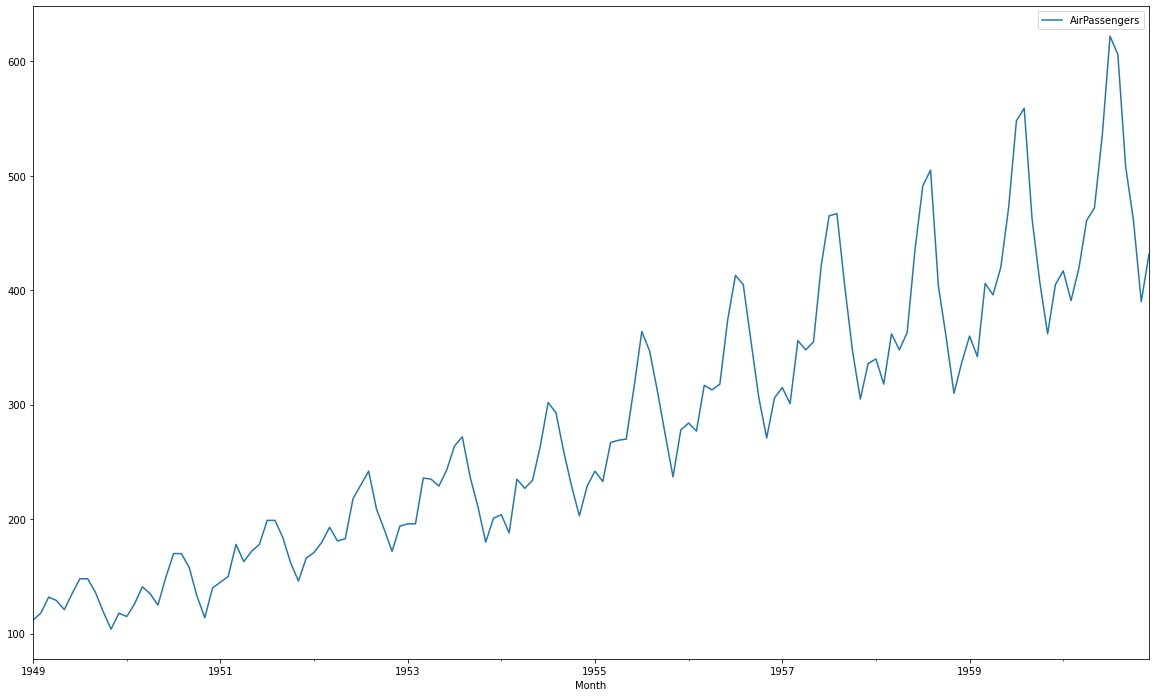

In [8]:
data.set_index('Month').plot(figsize=(20, 12))

In [9]:
p = Prophet()

/home/masoud/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/masoud/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/masoud/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [11]:
data = data.rename(columns={
    'Month': 'ds',
    'AirPassengers': 'y'
})
data.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [12]:
p.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = p.make_future_dataframe(periods=36, freq='MS')
future.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [14]:
future

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [15]:
data

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [16]:
forecast = p.predict(future)

In [17]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.843854,56.637728,113.358025,106.843854,106.843854,-21.515973,-21.515973,-21.515973,-21.515973,-21.515973,-21.515973,0.0,0.0,0.0,85.327882
1,1949-02-01,109.007424,50.127552,106.168074,109.007424,109.007424,-30.222614,-30.222614,-30.222614,-30.222614,-30.222614,-30.222614,0.0,0.0,0.0,78.784811
2,1949-03-01,110.961617,81.375135,138.310554,110.961617,110.961617,-0.484120,-0.484120,-0.484120,-0.484120,-0.484120,-0.484120,0.0,0.0,0.0,110.477497
3,1949-04-01,113.125187,78.878876,137.109441,113.125187,113.125187,-4.972009,-4.972009,-4.972009,-4.972009,-4.972009,-4.972009,0.0,0.0,0.0,108.153177
4,1949-05-01,115.218964,82.619155,140.916852,115.218964,115.218964,-3.645361,-3.645361,-3.645361,-3.645361,-3.645361,-3.645361,0.0,0.0,0.0,111.573603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,582.331434,622.615149,682.528945,579.642134,585.230353,67.551594,67.551594,67.551594,67.551594,67.551594,67.551594,0.0,0.0,0.0,649.883028
176,1963-09-01,585.449638,571.921977,629.958032,582.620657,588.515776,17.118610,17.118610,17.118610,17.118610,17.118610,17.118610,0.0,0.0,0.0,602.568248
177,1963-10-01,588.467255,539.352722,596.408668,585.505804,591.704915,-22.089014,-22.089014,-22.089014,-22.089014,-22.089014,-22.089014,0.0,0.0,0.0,566.378241
178,1963-11-01,591.585460,505.006275,563.341896,588.520837,594.939241,-57.067383,-57.067383,-57.067383,-57.067383,-57.067383,-57.067383,0.0,0.0,0.0,534.518077


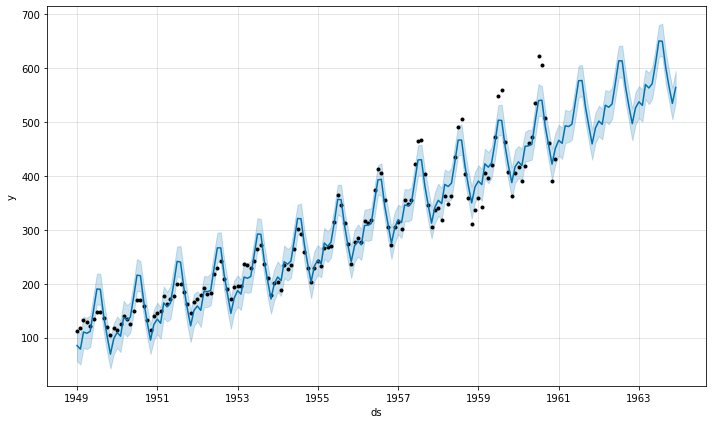

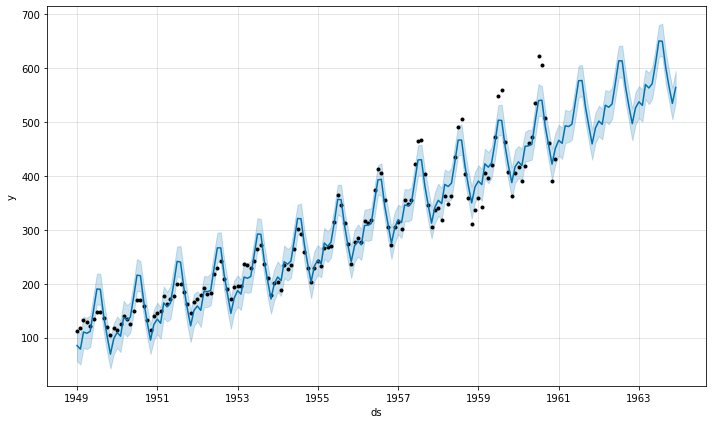

In [19]:
p.plot(forecast, uncertainty=True)

In [ ]:
p.plot_components(forecast)